### CAPM

- In this exercise we will fit CAPM with real financial data(stock prices) and test whether the predictions of CAPM are true.

In [28]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()
import pandas_datareader.data as web
import statsmodels.api as sm
from statsmodels.formula.api import ols 

### Empirical test of CAPM

- We will conduct a simple test on whether the predictions of CAPM hold.
    - Asset return is a function of how much risk it is exposed to.
    - Thus, asset returns should be increasing in betas.
- It is done by the following steps.
    - Setting up the sample data
    - Estimating betas
    - Estimating the SML

In [8]:
df = pd.read_excel('beta_data.xls',  index_col=0, parse_date = True, header=3)

In [9]:
df

,Low Beta,2,3,High Beta,Low Beta.1,2.1,3.1,High Beta.1,Low Beta.2,2.2,...,3.5,High Beta.5,Low Beta.6,2.6,3.6,High Beta.6,Low Beta.7,2.7,3.7,High Beta.7
date,,,,,,,,,,,,,,,,,,,,,
196307,-0.233,-0.471,3.787,0.002,0.863,0.151,-0.597,-2.090,0.353,0.408,...,0.6966,0.5497,0.4947,0.4503,0.5452,0.8183,0.5834,0.5002,0.4438,0.3788
196308,1.124,-0.661,2.007,9.214,2.145,2.878,6.162,6.429,4.328,3.907,...,0.4689,0.6331,0.4935,0.4637,0.5328,0.8075,0.5463,0.5124,0.4356,0.3817
196309,-0.729,5.764,-0.323,-2.947,-1.337,0.236,-3.178,-4.137,-1.121,-2.219,...,0.4521,0.5482,0.4785,0.4424,0.5239,0.7232,0.5181,0.5073,0.4236,0.3678
196310,-0.939,1.462,0.544,2.286,-0.881,-1.154,-1.740,3.197,-0.895,-1.630,...,0.4559,0.5551,0.4871,0.4518,0.5503,0.7749,0.5119,0.5564,0.4403,0.3616
196311,-0.187,-0.706,-0.987,-0.994,-1.203,-0.654,-2.242,1.711,-1.314,-0.799,...,0.4660,0.6216,0.4192,0.4600,0.5125,0.6030,0.5436,0.5544,0.4434,0.3579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199808,-17.179,-16.508,-18.697,-23.085,-15.007,-16.385,-21.545,-26.331,-12.578,-16.167,...,2.0344,0.7662,0.6048,1.0952,1.5151,0.5604,0.5786,0.4059,0.2918,0.3000
199809,-1.690,-0.286,1.150,8.348,-0.335,2.835,4.701,9.024,3.717,4.291,...,3.3527,1.0314,0.6974,1.3192,1.1749,0.9185,0.5625,0.3886,0.3556,0.3756
199810,1.790,1.363,-0.061,5.254,-1.174,1.410,2.798,6.922,1.130,4.353,...,3.5288,1.1082,0.6792,1.2727,0.8448,0.8498,0.5799,0.3654,0.3276,0.3308


In [13]:
pfs = np.mat(df.iloc[:,:16]) # 16 portfolios formed on size and past beta
factors = np.mat(df.iloc[:,16]) # market portfolio
BMs = np.mat(df.iloc[:,17:]) # 16 portfolios formed on B/M ratio and past beta

T, N = pfs.shape

In [21]:
pfs.shape

(426, 16)

In [22]:
X.shape

(426, 2)

In [14]:
# 1-stage time-series regression (estimating beta for each portfolio)

X = sm.add_constant(factors.T)

ts_model = sm.OLS(pfs, X).fit()
alphas = ts_model.params[0]
betas = ts_model.params[1:]
print("beta estimates from 1-stage time-series regression:")
print("rows: small to big, columns: low to high")
np.mat(betas).reshape(4,4)

beta estimates from 1-stage time-series regression:
rows: small to big, columns: low to high


matrix([[0.77842172, 0.98245255, 1.13454692, 1.33811698],
        [0.74968325, 1.02779653, 1.21785727, 1.44684187],
        [0.71854073, 1.01907206, 1.20557186, 1.50285895],
        [0.71755303, 0.97620692, 1.18288207, 1.41142603]])

#### In other words, fit

$r_{i,t} - r_{f,t} = \alpha_i + \beta_i \left( r_{M,t} - r+{f,t} \right) + u_{i,t}$ 

and get $\beta_i$

In [15]:
# 2-nd step cross-sectional regression (estimating SML)

betas1 = sm.add_constant(betas.T)
cs_model1 = sm.OLS(pfs.T, betas1).fit()

gammas = cs_model1.params.T

avg_gamma = np.mean(gammas,0)
stds = np.std(gammas,0)/np.sqrt(T)

print("averages of gamma0 and gamma1:")
print(avg_gamma)
print("standard errors:")
print(stds)
print("t-values:")
print(avg_gamma/stds)

averages of gamma0 and gamma1:
[ 1.41661596 -0.08718031]
standard errors:
[0.17861533 0.2837532 ]
t-values:
[ 7.93109966 -0.30723993]


#### Estimating the SML
$\overline{r_i - r_f} = \gamma_0 + \gamma_1\beta_i+\epsilon_i$
- If CAPM holds, $\hat{\gamma_0}=0$ and $\hat{\gamma_M}>0$ should hold.

The estimated model

$\hat{\overline{r_i - r_f}} = 1.42^{***} - 0.09\beta_i$

- Does CAPM hold?
- Given that $\gamma_0$ is negative and insignificant, CAPM doesn't hold.

In [26]:
data = pd.DataFrame()
for code in ['005930', '000660', '035720', '035420'] : 
    data = pd.concat([data,web.DataReader(code, 'naver', start='2015-01-01', end='2020-01-01')['Close'].apply(int)], axis=1)

data.columns = ['se', 'skh', 'kk','nvr']
data['kospi'] = web.DataReader('^KS11', 'yahoo', start='2015-01-01', end='2020-01-01')['Close'].apply(int)
noa = len(data.columns)
data.head()

,se,skh,kk,nvr,kospi
2015-01-02 00:00:00,26600,47750,27538,146407,1926.0
2015-01-05 00:00:00,26660,47650,29003,150012,1915.0
2015-01-06 00:00:00,25900,47500,29164,148811,1882.0
2015-01-07 00:00:00,26140,47400,29746,146607,1883.0
2015-01-08 00:00:00,26280,49950,29565,149011,1904.0


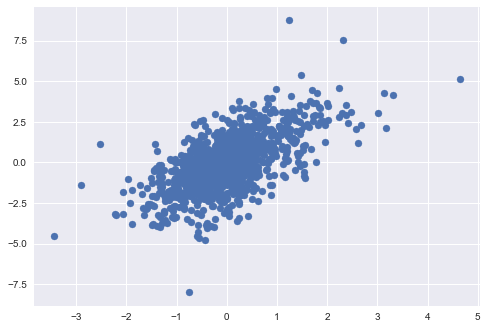

In [27]:
x = ret['kospi'].values
y = ret['se'].values
plt.style.use('seaborn')
plt.scatter(x,y)
plt.show()

$R_{se} = \alpha + \beta R_m + e$

In [29]:
retMonthly = ret.asfreq('m', method='bfill')

monthly_ols = ols('se~1+kospi', data=retMonthly).fit()
monthly_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     se   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     55.60
Date:                Tue, 12 Oct 2021   Prob (F-statistic):           5.52e-10
Time:                        20:29:13   Log-Likelihood:                -90.993
No. Observations:                  59   AIC:                             186.0
Df Residuals:                      57   BIC:                             190.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0549      0.152     -0.361      0.719      -0.359       0.249
kospi          1.5005      0.201      7.457      0.000       1.098       1.903
==============================================================================
Omnibus:                        3.023   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.221   Jarque-Bera (JB):                2.417
Skew:                          -0.191   Prob(JB):                        0.299
Kurtosis:                       3.915   Cond. No.                         1.38
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
coefs_a = []
coefs_b = []
tvalues_a = []
tvalues_b = []

j = 24
while j <= len(retMonthly):
    data = retMonthly.iloc[j-24:j, :]
    coefs = ols('se~1+kospi', data=data).fit().params
    coefs_a.append(coefs[0])
    coefs_b.append(coefs[1])
    tvalues = ols('se~1+kospi', data=data).fit().tvalues
    tvalues_a.append(tvalues[0])
    tvalues_b.append(tvalues[1])
    j += 1

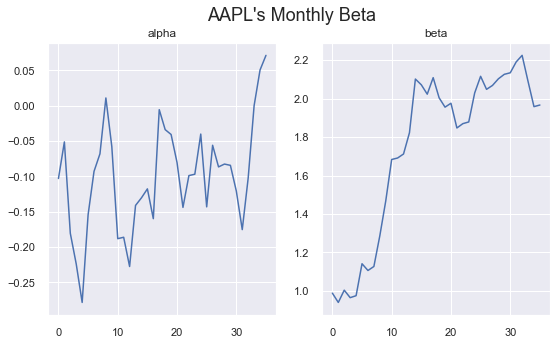

In [31]:
fig, ax = plt.subplots(1,2, figsize=(9,5))

ax[0].plot(coefs_a)
ax[0].set_title("alpha")
ax[1].plot(coefs_b)
ax[1].set_title("beta")
plt.suptitle("AAPL's Monthly Beta", fontsize=18);